## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import scipy.stats as sem
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID"])
# Display the data table for preview
merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
len(merged_data["Mouse ID"])

1893

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
non_dup = merged_data.loc[merged_data.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"]
non_dup

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
dupColumn = merged_data.loc[merged_data["Mouse ID"] == "g989"]
dupColumn

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merged_data.drop(dupColumn.index)
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
duplicated_dropped = cleaned_df.loc[cleaned_df["Mouse ID"] == "g989"]
duplicated_dropped

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [8]:
# Checking the number of mice in the clean DataFrame.
len(cleaned_df)

1880

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
grouped_mean = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
grouped_median = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
grouped_var = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
grouped_std = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
grouped_sem = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
summary_stats = pd.DataFrame({"Mean": grouped_mean,
                              "Median": grouped_median,
                              "Variance": grouped_var,
                              "Standard Variation": grouped_std,
                              "Standard Error": grouped_sem
                             })
summary_stats


,Mean,Median,Variance,Standard Variation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
#To try things

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

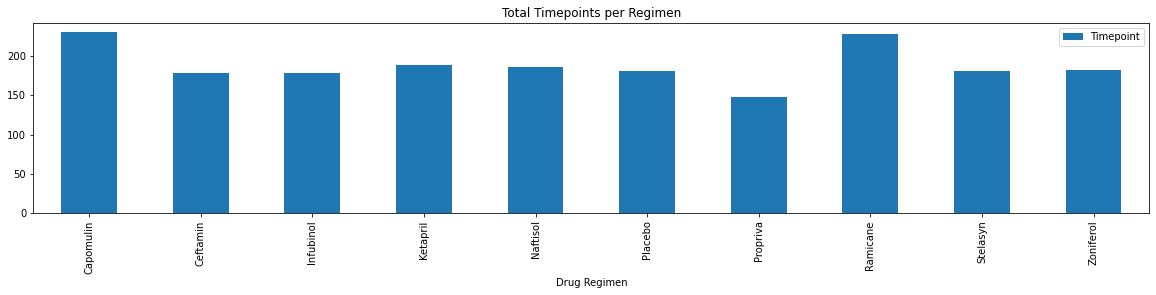

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# First let's group the mice by ID so we can count the total number of timepoints
time_group = cleaned_df.groupby("Drug Regimen")
time_group.head()
time_points =time_group.count()
DataFrame = time_points[["Timepoint"]]
DataFrame.plot(kind ="bar", figsize = (20,3.5))
plt.title("Total Timepoints per Regimen")
plt.show()

Text(0, 0.5, 'Total Timepoint')

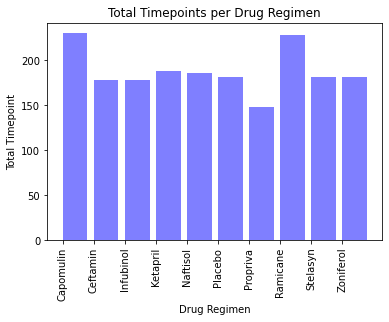

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
y_axis = DataFrame["Timepoint"]
x_axis = np.arange(len(y_axis))
plt.bar(x_axis,y_axis, color = 'b', alpha = 0.5, align = 'edge')
tick_loc = [value for value in x_axis]
plt.xticks(tick_loc, DataFrame.index, rotation = 'vertical')
plt.title("Total Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Timepoint")

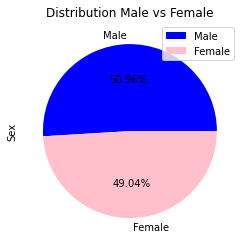

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_distribution = cleaned_df["Sex"].value_counts()
plot_pandas = gender_distribution.plot(kind = "pie", colors=("blue","pink"), title="Distribution Male vs Female", autopct = "%1.2f%%", legend = True)
plot_pandas.legend(loc = "best")


Male      958
Female    922
Name: Sex, dtype: int64

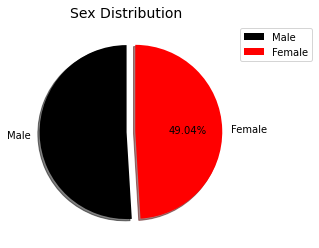

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_dis = cleaned_df["Sex"].value_counts()
explode = (0,0.1)
colors = ["black", "red"]
labels = list(gender_dis.index)
plt.pie(gender_dis, explode = explode, labels=labels, colors=colors,autopct='%1.2f%%', shadow=True, startangle=90)
plt.title("Sex Distribution", fontsize = 14)
plt.legend(labels, loc = 'best', frameon = True, bbox_to_anchor=(1,1))
gender_dis


## Quartiles, Outliers and Boxplots

In [28]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# tp = pd.Series()
ids = cleaned_df['Mouse ID']
times =cleaned_df['Timepoint']
volume = cleaned_df['Tumor Volume (mm3)']
new_df = pd.DataFrame()
new_df['Mouse ID'] = ids
new_df['Timepoint'] = times
new_df['Tumor Volume (mm3)'] = volume
initial_mouse = new_df['Mouse ID'][0]
my_dict = pd.DataFrame()
my_dict['Mouse ID'] = ''
my_dict['Tumor Volume (mm3)'] = ''
my_dict['Timepoint'] = ''
for i in new_df:
    if i[0] == initial_mouse:
        inital_mouse = i[0]
    else:
        my_dict.append(i)
            
            
            
# # Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# total = pd.merge(cleaned_df, tp, how = 'left')
my_dict

TypeError: cannot concatenate object of type '<class 'str'>'; only Series and DataFrame objs are valid

In [19]:
# Put treatments into a list for for loop (and later for plot labels)
initial_mouse = new_df['Mouse ID'][0]
new_dfgroup = new_df.groupby('Mouse ID')
new_dfgroup.head()
# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

,Mouse ID,Timepoint,Tumor Volume (mm3)
0,k403,0,45.000000
1,k403,5,38.825898
2,k403,10,35.014271
3,k403,15,34.223992
4,k403,20,32.997729
...,...,...,...
1883,z969,0,45.000000
1884,z969,5,49.332999
1885,z969,10,52.656081
1886,z969,15,54.713005


In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
